In [0]:
from google.colab import files
uploaded = files.upload()

Saving offenseval-training-v1.tsv to offenseval-training-v1 (3).tsv


In [0]:
import numpy as np
from keras.models import Sequential
from keras import layers
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
with open('offenseval-training-v1.tsv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f, dialect='excel', delimiter='\t')
    results = [] #tsv file 0:id, 1:sentence, 2: off/not
    sentences = []
    lables = []
    for row in reader:
        results.append(row)
        sentences.append(row[1])
        lables.append(row[2])
print(results[1][1])
count=0
removal_list = ["@USER","URL"]
import re
for sentence in sentences:
  edit_string_as_list = sentence.split()
  final_list = [word for word in edit_string_as_list if word not in removal_list]
  final_string = ' '.join(final_list)
  final_string = final_string.replace("#", "")
  #final_string = re.sub("^[a-z][a-z\s]*$", "", final_string) #remove non word chars
  sentences[count]=final_string.lower()
  count+=1



sentences_train, sentences_test, y_train, y_test = train_test_split( sentences, lables, test_size=0.2, random_state=1000)
print(len(y_train))
print(len(y_test))

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(sentences_train[2])
print(X_train[2])

from keras.preprocessing.sequence import pad_sequences
maxlen = 75
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

count=0;
for i in y_train:
  if(i=="OFF"):
    y_train[count]=0
  else:
    y_train[count]=1
  count+=1
print(y_train)
count=0;
for i in y_test:
  if(i=="OFF"):
    y_test[count]=0
  else:
    y_test[count]=1
  count+=1
print(y_test)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1] )) 
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1] ))

embedding_vecor_length = 50
model = Sequential()


model = Sequential()
model.add(layers.Embedding(5000, 50, input_length=maxlen))
model.add(layers.Conv1D(filters=170, kernel_size=4, padding='same', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.LSTM(100))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train,
                    epochs=2,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

@USER She should ask a few native Americans what their take on this is.
10592
2649
ward is were he is because he is really good at what he does. not every successful test player is good at presenting and commentating. ward and now key are a welcome addition to the sky team
[3709, 2, 109, 10, 2, 70, 10, 2, 102, 79, 47, 32, 10, 120, 18, 176, 1339, 1269, 822, 2, 79, 47, 4494, 5, 3709, 5, 73, 1709, 8, 4, 710, 4495, 3, 1, 1819, 469]
[  25   10    2 1338    8    1  947    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

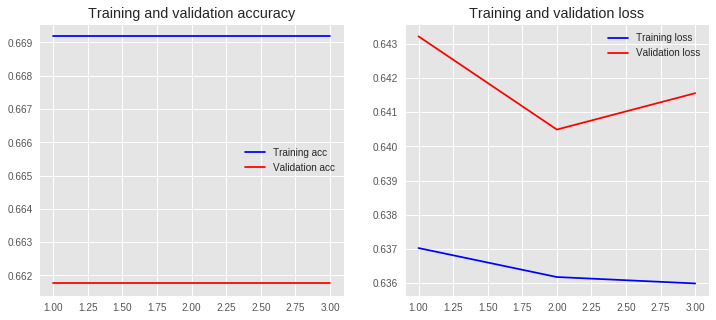

In [0]:
 plot_history(history)